In [1]:
# Cell 1: Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Set paths
DATA_DIR = Path("../data/raw")
PROCESSED_DIR = Path("../data/processed")
PROCESSED_DIR.mkdir(exist_ok=True)

In [3]:
# Cell 2: Load data
train_df = pd.read_csv(DATA_DIR / "fraudTrain.csv")
test_df = pd.read_csv(DATA_DIR / "fraudTest.csv")

In [4]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"\nColumns: {train_df.columns.tolist()}")

Train shape: (1296675, 23)
Test shape: (555719, 23)

Columns: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [5]:
# Cell 3: Basic statistics
print("=== Fraud Distribution ===")
print(train_df['is_fraud'].value_counts())
print(f"Fraud rate: {train_df['is_fraud'].mean():.4f}")

=== Fraud Distribution ===
is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Fraud rate: 0.0058


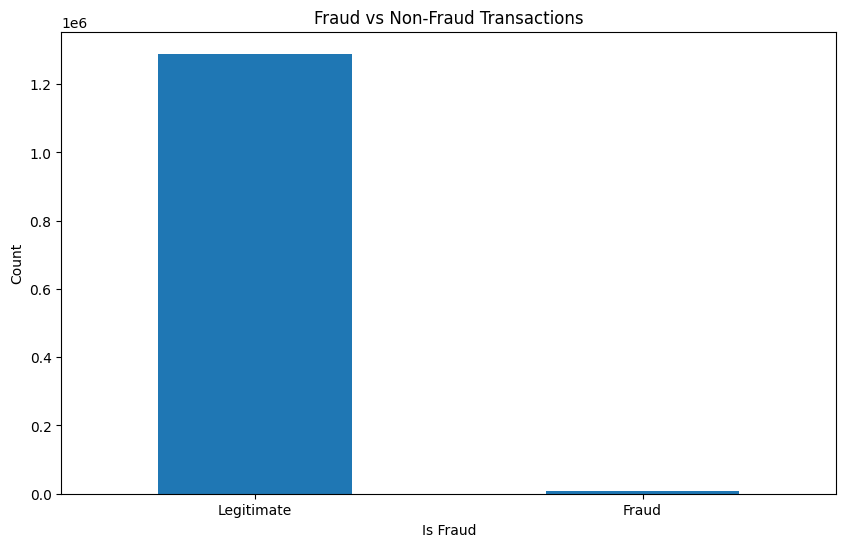

In [6]:
# Cell 4: Visualize fraud distribution
plt.figure(figsize=(10, 6))
train_df['is_fraud'].value_counts().plot(kind='bar')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Fraud'], rotation=0)
plt.show()

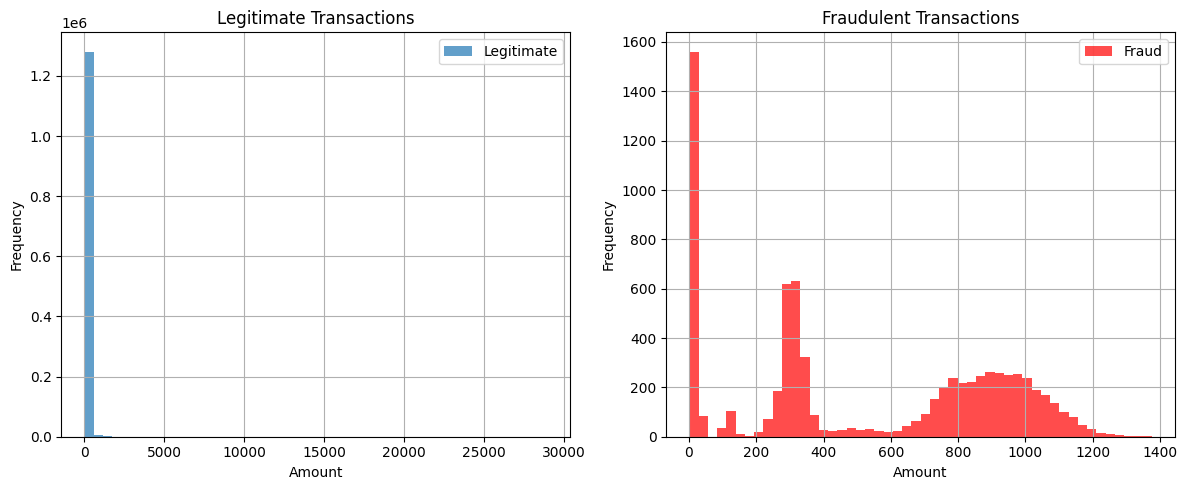

In [8]:
# Cell 5: Transaction amount analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_df[train_df['is_fraud']==0]['amt'].hist(bins=50, alpha=0.7, label='Legitimate')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Legitimate Transactions')
plt.legend()
-a=0.7, label='Fraud', color='red')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Fraudulent Transactions')
plt.legend()
plt.tight_layout()
plt.show()

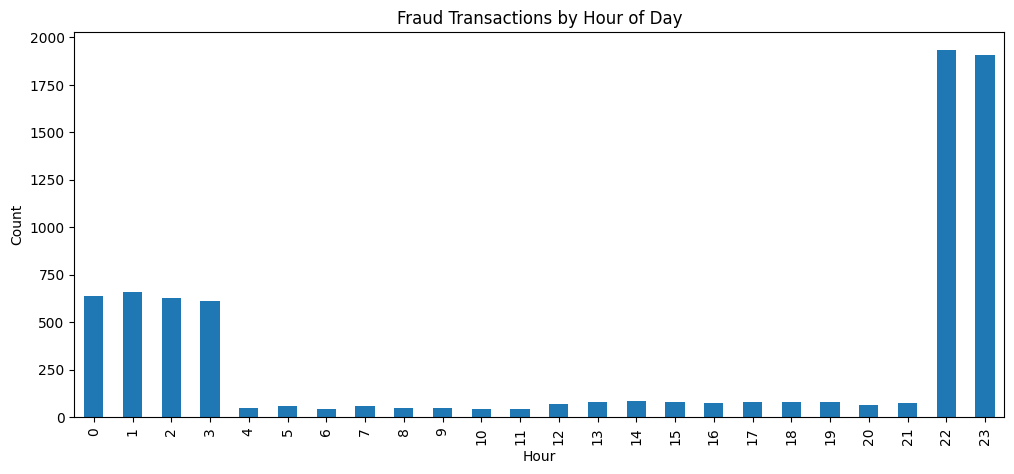

In [ ]:
# Cell 6: Time analysis
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['day_of_week'] = train_df['trans_date_trans_time'].dt.dayofweek

fraud_by_hour = train_df[train_df['is_fraud']==1].groupby('hour').size()
plt.figure(figsize=(12, 5))
fraud_by_hour.plot(kind='bar')
plt.title('Fraud Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [ ]:
# Cell 7: Save summary statistics (FIXED)
summary = {
    'total_transactions': int(len(train_df)),
    'fraud_transactions': int(train_df['is_fraud'].sum()),
    'fraud_rate': float(train_df['is_fraud'].mean()),
    'avg_amount': float(train_df['amt'].mean()),
    'avg_fraud_amount': float(train_df[train_df['is_fraud']==1]['amt'].mean()),
    'unique_merchants': int(train_df['merchant'].nunique()),
    'unique_categories': int(train_df['category'].nunique())
}

import json
from pathlib import Path

# Ensure the directory exists
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

with open(PROCESSED_DIR / 'data_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("\n=== Summary saved to data_summary.json ===")
print(json.dumps(summary, indent=2))


=== Summary saved to data_summary.json ===
{
  "total_transactions": 1296675,
  "fraud_transactions": 7506,
  "fraud_rate": 0.005788651743883394,
  "avg_amount": 70.35103545607032,
  "avg_fraud_amount": 531.3200919264589,
  "unique_merchants": 693,
  "unique_categories": 14
}
